In [1]:
import time
import timeit
import numpy as np

from mgcpy.independence_tests.mgc.mgc import MGC
from mgcpy.benchmarks import simulations as sims

In [2]:
def wrapper(func, *args, **kwargs):
    def wrapped():
        return func(*args, **kwargs)
    return wrapped

In [3]:
def mgc(X, Y, is_fast=False):
    mgc = MGC()
#     mgc_statistic, independence_test_metadata = mgc.test_statistic(X, Y)
    p_value, metadata = mgc.p_value(X, Y, is_fast=is_fast)  # p-value call has mgc.test_statistic(X, Y) call
#     print("MGC stats from Python:")
#     print("MGC test statistic:", metadata["test_statistic"])
#     print("P Value:", p_value)
#     print("Optimal Scale:", metadata["optimal_scale"])
    return p_value, metadata

In [4]:
import matplotlib.pyplot as plt;
import seaborn as sns
sns.color_palette('Set1')
sns.set(color_codes=True, style='white', context='talk', font_scale=1)

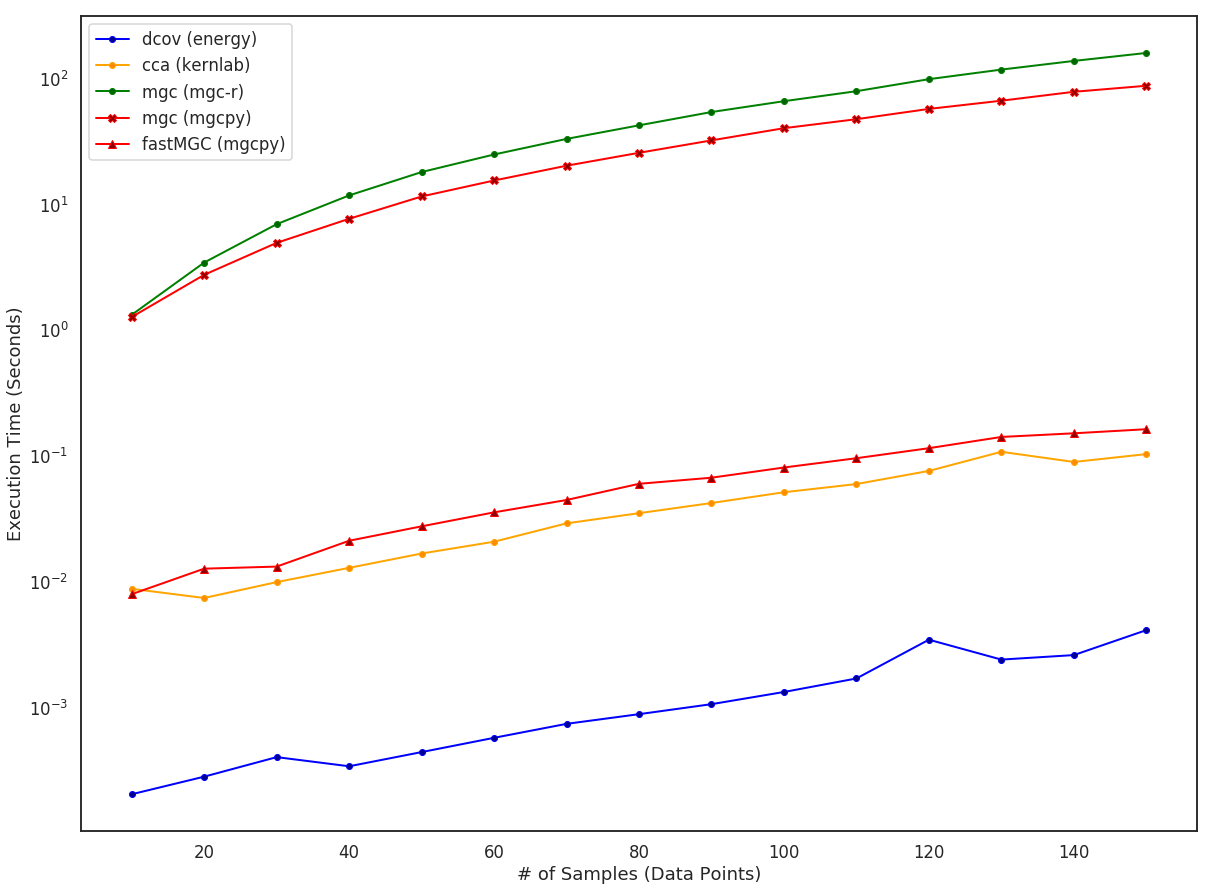

In [22]:
num_samples = range(10, 151, 10)
r_energy_times = {10: [0.0002958775, 0.0001840591, 0.0002219677, 0.0001618862, 0.0001580715], 20: [0.0002830029, 0.0002670288, 0.0002810955, 0.0002799034, 0.0002989769], 30: [0.0005919933, 0.000538826, 0.0003039837, 0.0002949238, 0.0002858639], 40: [0.0003530979, 0.0003750324, 0.0003180504, 0.0003209114, 0.0003378391], 50: [0.0004370213, 0.0003991127, 0.0003790855, 0.0005300045, 0.0004651546], 60: [0.0005710125, 0.0006461143, 0.0005590916, 0.0005528927, 0.0005409718], 70: [0.0007171631, 0.0006790161, 0.0006730556, 0.000674963, 0.000962019], 80: [0.0011971, 0.0006430149, 0.0006930828, 0.0009689331, 0.0009229183], 90: [0.001093864, 0.001049995, 0.001049042, 0.001057148, 0.001064062], 100: [0.001284122, 0.001270056, 0.001427889, 0.001445055, 0.001212835], 110: [0.001680136, 0.001824141, 0.001522064, 0.001688957, 0.001790047], 120: [0.001813889, 0.002628088, 0.010432, 0.001279116, 0.001140118], 130: [0.001960993, 0.002722979, 0.002477884, 0.002809048, 0.002046108], 140: [0.002289057, 0.002441883, 0.002943039, 0.002821207, 0.002553225], 150: [0.003201962, 0.002632856, 0.00288105, 0.009802103, 0.002078056]}
r_kernlab_times = {10: [0.01676011, 0.007287979, 0.00682497, 0.006921053, 0.006088018], 20: [0.007632971, 0.007198811, 0.007509947, 0.007214069, 0.007555008], 30: [0.01064205, 0.00940609, 0.009012938, 0.01036596, 0.01020408], 40: [0.0126369, 0.01262498, 0.01258993, 0.01441121, 0.01216912], 50: [0.0171411, 0.016505, 0.01809788, 0.01662302, 0.01537919], 60: [0.02690315, 0.02051878, 0.01871395, 0.01887703, 0.01894593], 70: [0.02738309, 0.02758408, 0.03414202, 0.02837396, 0.02797699], 80: [0.0347321, 0.0334661, 0.03399396, 0.03954887, 0.03351712], 90: [0.04167604, 0.04005313, 0.04699516, 0.04172301, 0.04062009], 100: [0.05443311, 0.05306387, 0.04874015, 0.053653, 0.04720712], 110: [0.06231713, 0.0568409, 0.058918, 0.06483698, 0.05578303], 120: [0.07325602, 0.09065008, 0.07400417, 0.07492685, 0.06695199], 130: [0.08332682, 0.08363104, 0.08216095, 0.2152081, 0.07479095], 140: [0.09304309, 0.08766484, 0.08723497, 0.09264898, 0.08696103], 150: [0.1041889, 0.1032681, 0.103044, 0.1010001, 0.1051769]}
r_perf_times = {10: [1.179895, 1.435764, 1.392574, 1.364731, 1.244356], 20: [3.626441, 3.38207, 3.435028, 3.312011, 3.472121], 30: [6.725924, 7.19072, 6.850648, 7.024207, 6.970873], 40: [11.60234, 11.26915, 11.36571, 12.27015, 12.33833], 50: [19.56418, 17.98312, 17.36909, 17.16499, 18.17077], 60: [25.21052, 24.80274, 24.37495, 24.47379, 25.59039], 70: [33.09666, 33.38766, 32.52008, 32.90658, 33.6318], 80: [41.91707, 42.18968, 42.25746, 43.52817, 42.34682], 90: [54.26672, 60.08258, 52.39857, 51.12012, 52.91298], 100: [66.36207, 70.70109, 64.84415, 65.04437, 63.17586], 110: [76.69378, 77.56344, 79.68007, 79.66596, 82.81884], 120: [97.89148, 96.41177, 99.12007, 100.0838, 100.4973], 130: [119.39, 117.1136, 118.6135, 117.5654, 116.0784], 140: [139.2461, 136.9656, 137.8895, 136.6488, 139.2114], 150: [158.5903, 156.5999, 161.6194, 160.23, 161.1935]}
linear_data_copy = [(10, [1.3570548910065554, 1.317704908986343, 1.250599796010647, 1.2129867470066529, 1.2188538330083247]), (20, [2.809477289003553, 2.662971756013576, 2.668166168994503, 2.810354543995345, 2.8085849939961918]), (30, [5.089567081973655, 4.908904140000232, 4.963905091979541, 4.862470469990512, 4.872956630017143]), (40, [7.7755367509962525, 7.639183080988005, 7.636393271997804, 7.643885943980422, 7.673354588012444]), (50, [11.33807383000385, 11.284572928998386, 11.579023433005204, 11.935501523985295, 11.589415601018118]), (60, [15.944066369003849, 15.691345383005682, 15.252294573001564, 15.21922270700452, 15.21380895600305]), (70, [20.097495351015823, 20.11479070200585, 20.14134455099702, 20.623360280005727, 20.394629952003015]), (80, [25.643525285995565, 25.59139153698925, 25.659372112015262, 25.80397002500831, 25.668325702979928]), (90, [32.741740912984824, 31.854122709017247, 31.89940690298681, 31.885286441014614, 32.73692899401067]), (100, [41.03519103198778, 40.1257850920083, 40.30881031299941, 39.976445167005295, 39.989109216985526]), (110, [46.49892311100848, 48.002260846988065, 48.743909012991935, 47.894316210004035, 46.35784816299565]), (120, [57.73439836999751, 59.01353847500286, 56.690341667999746, 56.15975032598362, 57.02876815799391]), (130, [67.02439867099747, 68.27157784899464, 66.59815313798026, 65.15316394198453, 66.08920010898146]), (140, [79.0230416849954, 77.24781862000236, 79.41891040399787, 77.30308651400264, 79.06514339800924]), (150, [90.88946284601116, 86.56499147901195, 86.16265920398291, 86.45272049200139, 87.83721533801872])]
python_perf_times = [j for i, j in linear_data_copy]
linear_data_fast_mgc = [(10, [0.009937260998412967, 0.006971208960749209, 0.00851285899989307, 0.007001145975664258, 0.007364065037108958]), (20, [0.013805667986162007, 0.012984061962924898, 0.012354757986031473, 0.013664765981957316, 0.010665838024578989]), (30, [0.01729093200992793, 0.012268604943528771, 0.012671170989051461, 0.011940094991587102, 0.011755009065382183]), (40, [0.020842907018959522, 0.018102316069416702, 0.022479727980680764, 0.02483542903792113, 0.019535422092303634]), (50, [0.03613659495022148, 0.026224412955343723, 0.025395689997822046, 0.024829013971611857, 0.02520094090141356]), (60, [0.034173641935922205, 0.03446560900192708, 0.03535817901138216, 0.039391946978867054, 0.034553198027424514]), (70, [0.04626641294453293, 0.04520784202031791, 0.04255034390371293, 0.04290726501494646, 0.04613724094815552]), (80, [0.06585719098802656, 0.057089149951934814, 0.05837591795716435, 0.058390229009091854, 0.06029797799419612]), (90, [0.06505067890975624, 0.06504994304850698, 0.06521781696937978, 0.07156319194473326, 0.06859320495277643]), (100, [0.08849724300671369, 0.0775414330419153, 0.07958152203354985, 0.07980452594347298, 0.0788903699722141]), (110, [0.09184161003213376, 0.08922904101200402, 0.09646733594127, 0.09718551696278155, 0.10458254802506417]), (120, [0.1191785610280931, 0.11659046495333314, 0.10537252889480442, 0.1160321970237419, 0.11862371896859258]), (130, [0.13264634809456766, 0.13590998807922006, 0.15327011398039758, 0.14836418896447867, 0.137127390014939]), (140, [0.15582118893507868, 0.1476625050418079, 0.1529817070113495, 0.15209201897960156, 0.14758490701206028]), (150, [0.16182203008793294, 0.17047211597673595, 0.16169877001084387, 0.15995072096120566, 0.16114080895204097])]
python_perf_times_fast_mgc = [j for i, j in linear_data_fast_mgc]

mgcr_data = [np.mean(v) for k, v in r_perf_times.items()]
mgcpy_data = [np.mean(i) for i in python_perf_times]
fastmgc_data = [np.mean(i) for i in python_perf_times_fast_mgc]
renergy_data = [np.mean(v) for k, v in r_energy_times.items()]
rkernlab_data = [np.mean(v) for k, v in r_kernlab_times.items()]

plt.figure(figsize=(20,15))
plt.semilogy(num_samples, renergy_data, marker='o', markerfacecolor='darkblue', markersize=6, color='blue', linewidth=2, label="dcov (energy)")
plt.semilogy(num_samples, rkernlab_data, marker='o', markerfacecolor='darkorange', markersize=6, color='orange', linewidth=2, label="cca (kernlab)")
plt.semilogy(num_samples, mgcr_data, marker='o', markerfacecolor='darkgreen', markersize=6, color='green', linewidth=2, label="mgc (mgc-r)")
plt.semilogy(num_samples, mgcpy_data, marker='X', markerfacecolor='darkred', markersize=8, color='red', linewidth=2, label="mgc (mgcpy)")
plt.semilogy(num_samples, fastmgc_data, marker='^', markerfacecolor='darkred', markersize=8, color='red', linewidth=2, label="fastMGC (mgcpy)")

plt.xlabel('# of Samples (Data Points)')
plt.ylabel('Execution Time (Seconds)')
plt.legend()
plt.show()